In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Exploration

In [2]:
mytrain = 'ICE_691'

In [3]:
df = pd.read_csv(f'../data/trains/{mytrain}_delay.csv', index_col=0)

In [4]:
df.rename_axis('date', inplace=True)

In [5]:
myroute = list(df.columns)

In [6]:
df

,Berlin Gesundbrunnen,Berlin Hbf (tief),Berlin Südkreuz,Lutherstadt Wittenberg Hbf,Leipzig Hbf,Erfurt Hbf,Eisenach,Fulda,Frankfurt(Main)Hbf,Mannheim Hbf,Stuttgart Hbf,Ulm Hbf,Augsburg Hbf,München-Pasing,München Hbf
date,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,0.0,1.0,20.0,33.0,36.0,35.0,35.0,39.0,65.0,60.0,56.0,0.0,0.0
2019-01-02,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,1.0,0.0,0.0,0.0
2019-01-03,NaN,NaN,1.0,5.0,10.0,9.0,10.0,8.0,4.0,11.0,17.0,15.0,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,27.0,26.0,21.0,23.0,25.0,24.0,21.0,20.0,19.0
2019-01-05,NaN,NaN,1.0,1.0,1.0,1.0,25.0,22.0,22.0,21.0,27.0,31.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,36.0,NaN,36.0,37.0,38.0,34.0,34.0,30.0,41.0,42.0,45.0,55.0,54.0,50.0,51.0
2021-09-09,18.0,NaN,17.0,17.0,18.0,17.0,20.0,17.0,25.0,26.0,25.0,30.0,28.0,29.0,29.0
2021-09-10,0.0,NaN,7.0,4.0,2.0,2.0,2.0,2.0,6.0,11.0,17.0,20.0,20.0,19.0,18.0


<AxesSubplot:ylabel='date'>

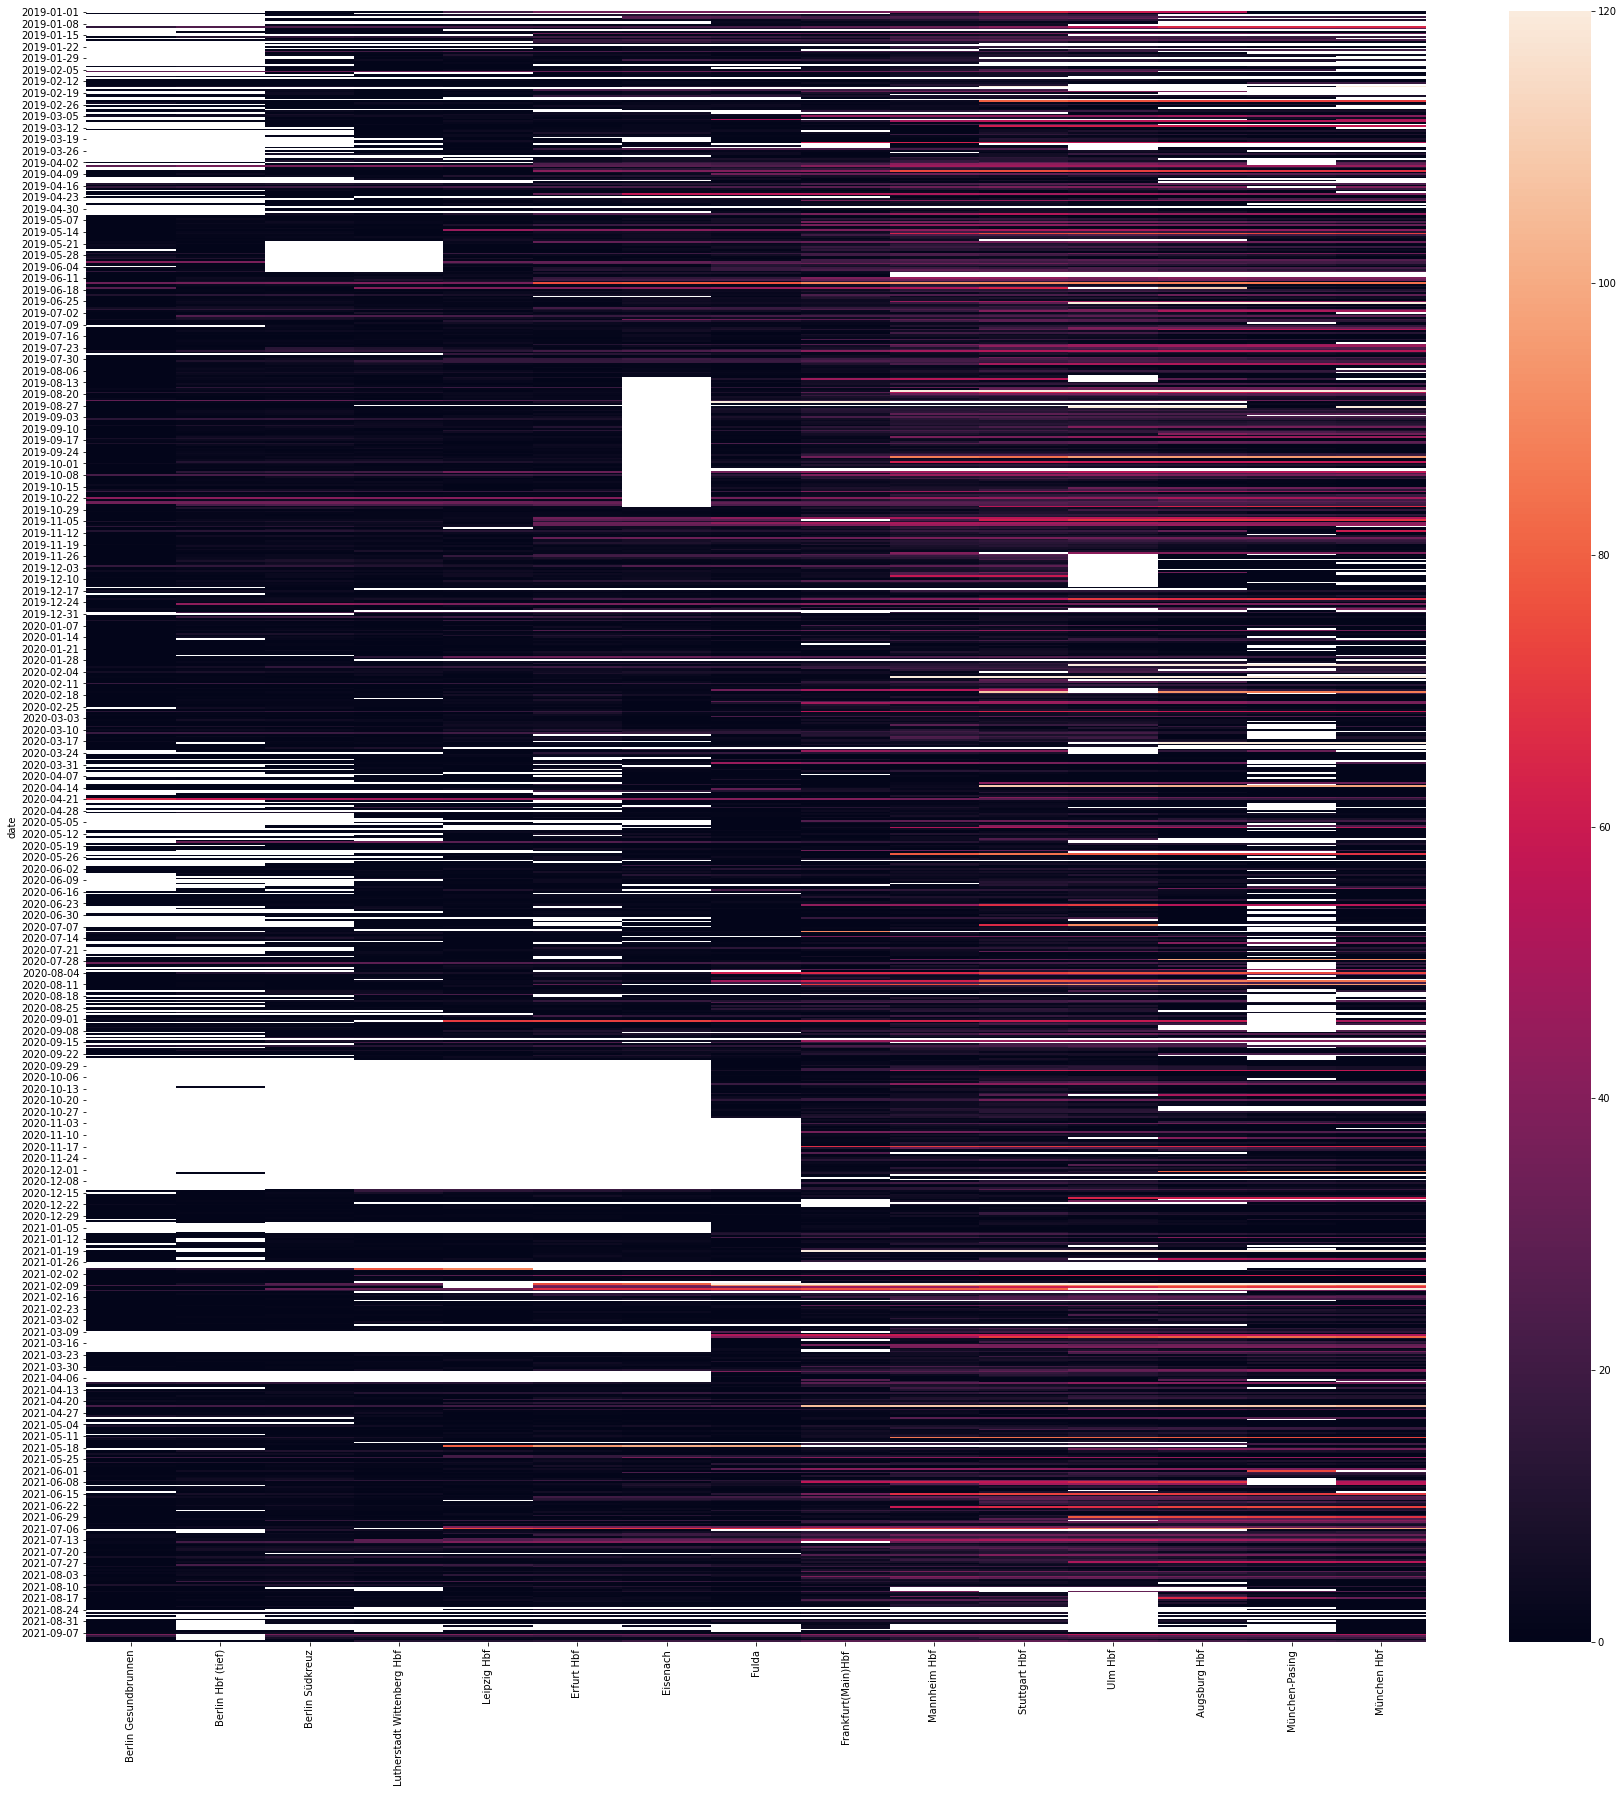

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(df, cbar=True, vmax=120)

Text(0.5, 1.0, 'ICE_691 average delay')

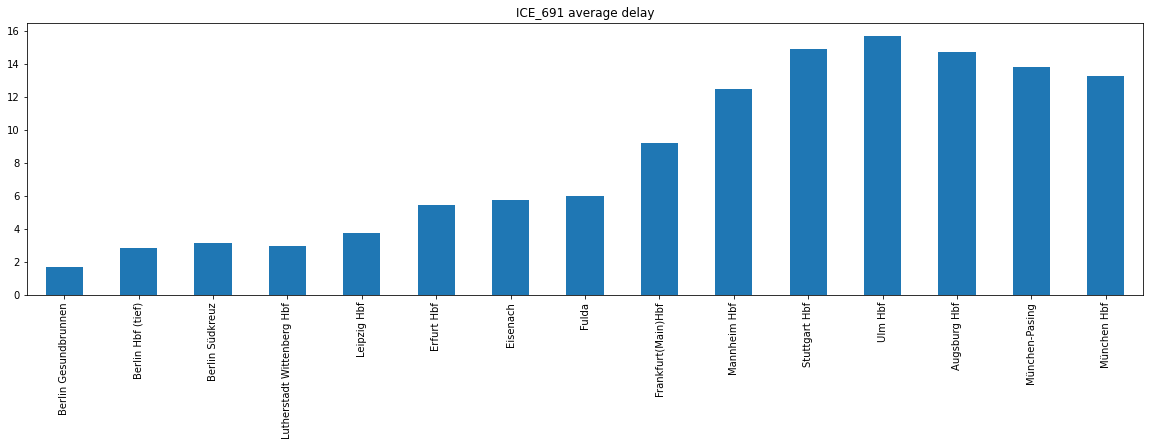

In [8]:
plt.figure(figsize=(20,5))
df.mean().plot.bar()
plt.title(f'{mytrain} average delay')

Text(0.5, 1.0, 'ICE_691 maximum delay')

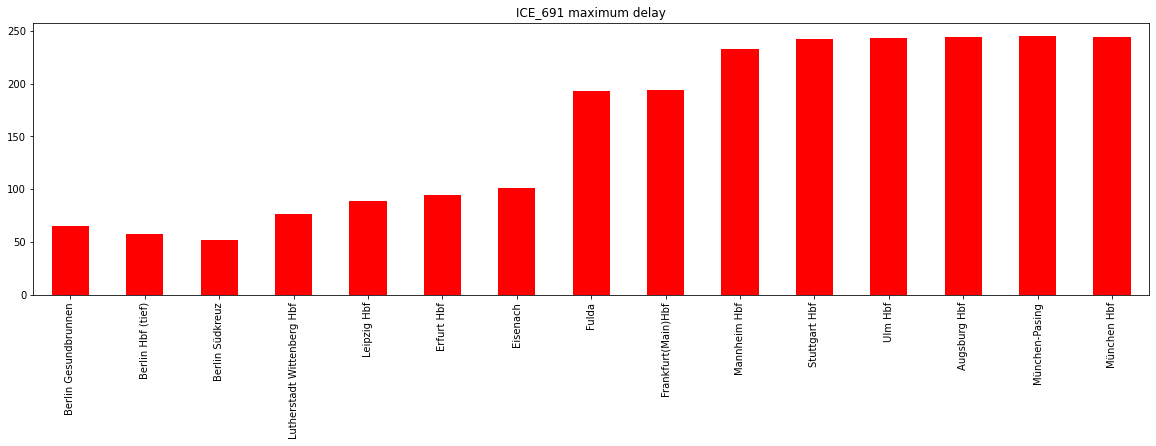

In [9]:
plt.figure(figsize=(20,5))
df.max().plot.bar(color='r')
plt.title(f'{mytrain} maximum delay')

## prototype

In [ ]:
mylist = ['Zürich HB', 'Freiburg(Breisgau) Hbf', 'Mainz Hbf', 'Köln Hbf', 'Münster(Westf)Hbf', 'Hamburg Hbf']
fig, axs = plt.subplots(len(mylist), 1, figsize=(30,30))
for i in range(len(mylist)):
    axs[i].plot(df.index, df[mylist[i]])
    axs[i].set_xlim(['2019-01-01', '2020-12-31'])
    axs[i].set_ylim([0, 60])
    axs[i].text(0.5,0.9, mylist[i],
        horizontalalignment='center',
        transform=axs[i].transAxes)

plt.setp(axs, xticks=[])
plt.subplots_adjust(wspace=0, hspace=0)

# Feature Engineering

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df['weekday'] = df.index.dayofweek

In [12]:
df['month'] = df.index.month

In [13]:
df = df.join(pd.get_dummies(df.weekday, prefix = 'd'))

In [14]:
df = df.join(pd.get_dummies(df.month, prefix = 'm'))

In [15]:
df.columns

Index(['Berlin Gesundbrunnen', 'Berlin Hbf (tief)', 'Berlin Südkreuz',
       'Lutherstadt Wittenberg Hbf', 'Leipzig Hbf', 'Erfurt Hbf', 'Eisenach',
       'Fulda', 'Frankfurt(Main)Hbf', 'Mannheim Hbf', 'Stuttgart Hbf',
       'Ulm Hbf', 'Augsburg Hbf', 'München-Pasing', 'München Hbf', 'weekday',
       'month', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'm_1', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11',
       'm_12'],
      dtype='object')

In [16]:
df.shape

(986, 36)

adding **"bundesweite Feiertage" (holidays)** and workdays before and after

In [17]:
holidays = []
with open('../data/holidays.txt', 'r') as myfile:
    holidays = myfile.read().splitlines()
    holidays = [pd.to_datetime(h, format="%d-%m-%Y") for h in holidays]

In [18]:
df['holiday'] = 0
df['before_h'] = 0
df['after_h'] = 0

In [19]:
for h in holidays:
    if h in df.index:
        df.at[h, 'holiday'] = 1
        df.at[h, 'after_h'] = 0
        befor_h = h - pd.Timedelta(days=1)
        after_h = h + pd.Timedelta(days=1)
        if befor_h in df.index and df.loc[befor_h, 'weekday'] < 5 and df.loc[befor_h, 'holiday'] == 0:
            df.at[befor_h, 'before_h'] = 1
        if after_h in df.index and df.loc[after_h, 'weekday'] < 5:
            df.at[after_h, 'after_h'] = 1

## exploring features

<AxesSubplot:xlabel='weekday'>

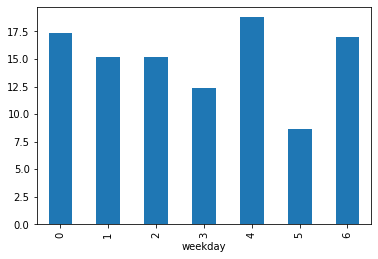

In [21]:
df.groupby("weekday")['Stuttgart Hbf'].mean().plot.bar()

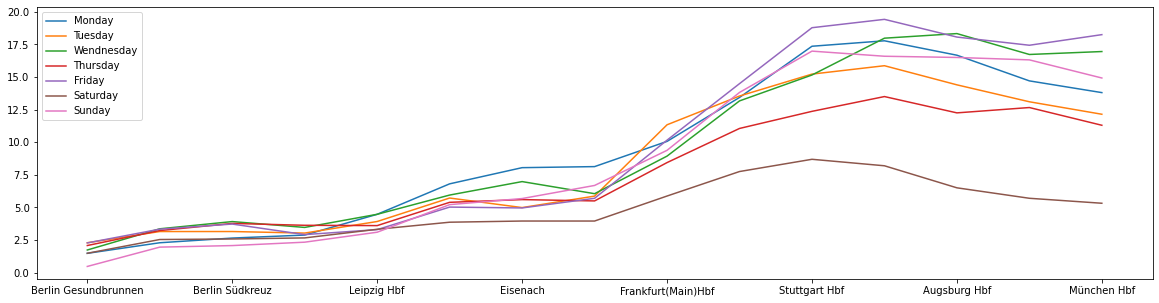

In [80]:
weekdays = ['Monday', 'Tuesday', 'Wendnesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20,5))
for i in range(7):
    df.loc[df.weekday == i][myroute].mean().plot(label=weekdays[i])
plt.legend()

## exploring the features

**PAULA:** lower grpah is better, few stations and weekdays

In [120]:
df.before_h.sum(), df.holiday.sum(), df.after_h.sum()

(15, 32, 14)

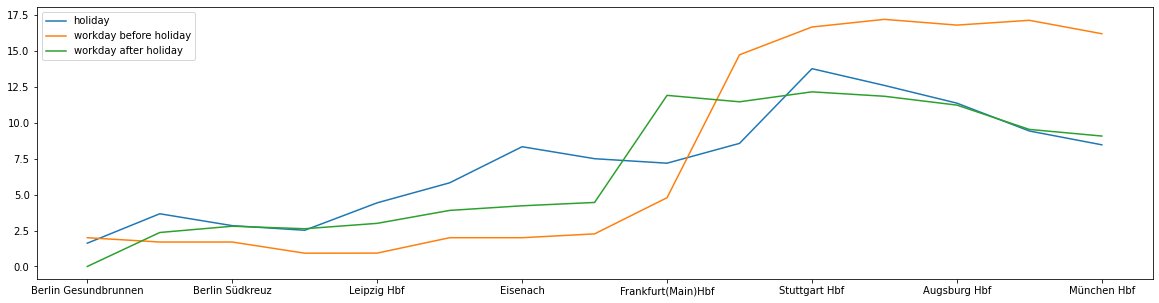

In [107]:
plt.figure(figsize=(20,5))
df.loc[df.holiday == 1][myroute].mean().plot(label='holiday')
df.loc[df.before_h == 1][myroute].mean().plot(label='workday before holiday')
df.loc[df.after_h == 1][myroute].mean().plot(label='workday after holiday')
plt.legend()

<AxesSubplot:xlabel='holiday'>

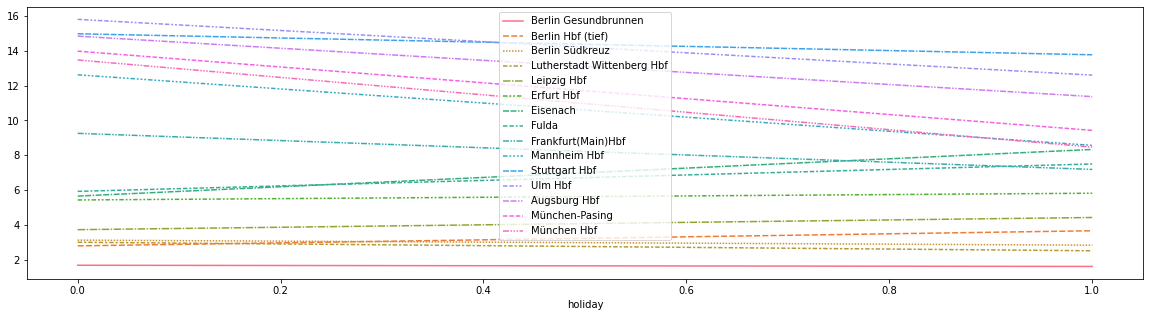

In [82]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df.groupby("holiday")[myroute].mean())

# machine learning

## machine learning modules

## prototype: train-test-split

In [84]:
myexample = 'Stuttgart Hbf'

In [85]:
df_sub = df[[myexample,
        'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
        'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
        'holiday', 'before_h', 'after_h']].copy()
df_sub.dropna(inplace=True)
df_sub.shape

(925, 23)

In [86]:
y = df_sub[myexample]
X = df_sub.drop([myexample], axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((740, 22), (185, 22), (740,), (185,))

## prototype: mean

In [92]:
y = df[myexample].dropna()

In [93]:
ypred = np.full(shape=y.shape, fill_value=y.mean())

In [94]:
mean_absolute_error(y, ypred)

13.292192257121988

## prototype: Linear Regression

In [112]:
mlr = LinearRegression()

In [113]:
mlr.fit(X_train, y_train)

LinearRegression()

In [114]:
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

In [115]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(13.210631334459459, 12.455236486486486)

## prototype: random forest

In [125]:
rf = RandomForestRegressor(max_depth=6, bootstrap=True)

In [126]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6)

In [127]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [128]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(12.809332673260458, 12.784646949141255)

In [117]:
df.head(10)

,Berlin Gesundbrunnen,Berlin Hbf (tief),Berlin Südkreuz,Lutherstadt Wittenberg Hbf,Leipzig Hbf,Erfurt Hbf,Eisenach,Fulda,Frankfurt(Main)Hbf,Mannheim Hbf,...,m_6,m_7,m_8,m_9,m_10,m_11,m_12,holiday,before_h,after_h
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,0.0,1.0,20.0,33.0,36.0,35.0,35.0,39.0,...,0,0,0,0,0,0,0,1,0,0
2019-01-02,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,0,0,0,0,0,0,0,0,0,1
2019-01-03,NaN,NaN,1.0,5.0,10.0,9.0,10.0,8.0,4.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,27.0,26.0,21.0,23.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-05,NaN,NaN,1.0,1.0,1.0,1.0,25.0,22.0,22.0,21.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-06,NaN,NaN,1.0,0.0,1.0,4.0,3.0,1.0,7.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2019-01-09,NaN,NaN,3.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0


# predicting mean as baseline

In [99]:
def evaluate_mean(mystation):
    y = df[mystation]
    y.dropna(inplace=True)
    ypred = np.full(shape=y.shape, fill_value=y.mean())
    return mean_absolute_error(y, ypred)

In [100]:
print('mean absoulte errors:')
print('')
error_total = 0
for mystation in myroute:
    error = evaluate_mean(mystation)
    error_total += error
    print(f'- {error:4.1f} - {mystation}')
print('')
print(f'- {error_total/len(myroute):4.1f} - average')

mean absoulte errors:

-  2.7 - Berlin Gesundbrunnen
-  3.4 - Berlin Hbf (tief)
-  3.5 - Berlin Südkreuz
-  3.7 - Lutherstadt Wittenberg Hbf
-  4.5 - Leipzig Hbf
-  6.1 - Erfurt Hbf
-  6.4 - Eisenach
-  7.3 - Fulda
-  9.6 - Frankfurt(Main)Hbf
- 11.5 - Mannheim Hbf
- 13.3 - Stuttgart Hbf
- 14.7 - Ulm Hbf
- 15.9 - Augsburg Hbf
- 15.7 - München-Pasing
- 15.8 - München Hbf

-  8.9 - average


# predicting with linear regression

In [135]:
def evaluate_lin_reg(mystation):
    df_sub = df[[mystation, 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',]].copy()
                #'m_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12']].copy()
                #'holiday', 'before_h', 'after_h']].copy()
    df_sub.dropna(inplace=True)
    y = df_sub[mystation]
    X = df_sub.drop([mystation], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    m = LinearRegression()
    m.fit(X_train, y_train)
    return mean_absolute_error(y_train, m.predict(X_train)), mean_absolute_error(y_test, m.predict(X_test))

In [136]:
print('mean absoulte errors:')
print('')
error_train_total = 0
error_test_total = 0
for mystation in myroute:
    error_train, error_test = evaluate_lin_reg(mystation)
    error_train_total += error_train
    error_test_total += error_test
    print(f'- {error_train:4.1f}, {error_test:4.1f} - {mystation}')
print('')
print(f'- {error_train_total/len(myroute):4.1f}, {error_test_total/len(myroute):4.1f} - average')

mean absoulte errors:

-  2.5,  3.1 - Berlin Gesundbrunnen
-  3.0,  4.0 - Berlin Hbf (tief)
-  3.6,  3.4 - Berlin Südkreuz
-  3.8,  3.6 - Lutherstadt Wittenberg Hbf
-  4.6,  4.4 - Leipzig Hbf
-  6.3,  5.7 - Erfurt Hbf
-  6.2,  6.7 - Eisenach
-  7.1,  7.6 - Fulda
-  9.6,  9.9 - Frankfurt(Main)Hbf
- 11.9, 10.2 - Mannheim Hbf
- 13.1, 12.7 - Stuttgart Hbf
- 14.3, 14.5 - Ulm Hbf
- 14.3, 18.9 - Augsburg Hbf
- 16.2, 13.4 - München-Pasing
- 15.4, 15.3 - München Hbf

-  8.8,  8.9 - average


# predicting with random forest

In [133]:
def evaluate_random_forest(mystation):
    df_sub = df[[mystation, 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
                'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12']].copy()
                #'holiday', 'before_h', 'after_h']].copy()
    df_sub.dropna(inplace=True)
    y = df_sub[mystation]
    X = df_sub.drop([mystation], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    m = RandomForestRegressor(max_depth=4, bootstrap=True)
    m.fit(X_train, y_train)
    return mean_absolute_error(y_train, m.predict(X_train)), mean_absolute_error(y_test, m.predict(X_test))

In [134]:
print('mean absoulte errors:')
print('')
error_train_total = 0
error_test_total = 0
for mystation in myroute:
    error_train, error_test = evaluate_random_forest(mystation)
    error_train_total += error_train
    error_test_total += error_test
    print(f'- {error_train:4.1f}, {error_test:4.1f} - {mystation}')
print('')
print(f'- {error_train_total/len(myroute):4.1f}, {error_test_total/len(myroute):4.1f} - average')

mean absoulte errors:

-  2.3,  3.1 - Berlin Gesundbrunnen
-  2.9,  4.1 - Berlin Hbf (tief)
-  3.5,  3.2 - Berlin Südkreuz
-  3.6,  3.9 - Lutherstadt Wittenberg Hbf
-  4.3,  4.5 - Leipzig Hbf
-  6.0,  5.8 - Erfurt Hbf
-  5.9,  6.9 - Eisenach
-  6.9,  7.5 - Fulda
-  9.3,  9.9 - Frankfurt(Main)Hbf
- 11.8, 10.6 - Mannheim Hbf
- 13.0, 12.6 - Stuttgart Hbf
- 13.9, 14.3 - Ulm Hbf
- 13.9, 19.3 - Augsburg Hbf
- 15.9, 13.8 - München-Pasing
- 15.0, 15.2 - München Hbf

-  8.6,  9.0 - average


### learning record (example EC_8):

- using mean 10.4 min
- linreg using weekdays/months 10.0/10.2 min
- linreg using weekdays/months and holidays 9.9/10.2 min
- random forest using weekdays/months/holidays 9.9/10.3 min